In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("kmeans - kmeans_blobs.csv")
data_normalized = (data - data.mean()) / data.std()

def initialize_centroids(X, k):
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

def assign_clusters(X, centroids):
    clusters = []
    for sample in X:
        distances = np.sqrt(np.sum((centroids - sample)**2, axis=1))
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for cluster in range(k):
        cluster_points = X[clusters == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroids[cluster] = centroid
    return centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.all(old_centroids == centroids):
            break
    return clusters, centroids



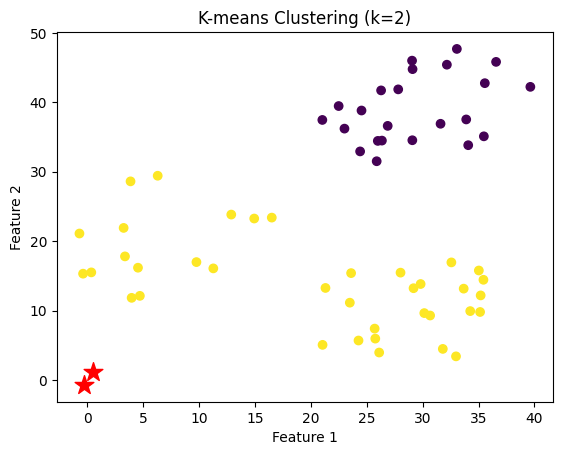

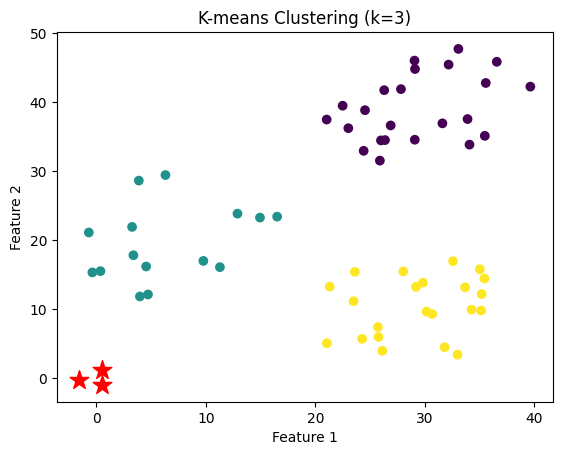

In [3]:
k = 2
clusters_2, centroids_2 = kmeans(data_normalized.values, k)

k = 3
clusters_3, centroids_3 = kmeans(data_normalized.values, k)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters_2, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='*', c='red', s=200)
plt.title('K-means Clustering (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters_3, cmap='viridis')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], marker='*', c='red', s=200)
plt.title('K-means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()